In [20]:
# We first import the libraries we will be using in this notebook
import numpy as np                              #numpy
import time                                     #time (to measure the time it takes to execute code)
import math                                     #math functions
from scipy import io, integrate, linalg, signal #scipy has some linear algebra and specialized libraries
import matplotlib.pyplot as plt                 #pyplot
from matplotlib.animation import FuncAnimation  #for animation purposes
from IPython.display import HTML, Video         #to produce video

plt.rcParams['figure.figsize'] = [15, 5]; #changes the size of the display window

# Fixed point iteration method

We implement the fixed point iteration method, and apply it to finding a root of the following function: 

In [21]:
def fun1(x): 
    return 1 + 0.9*np.sin(x)-x; 

In [24]:
def g1(x):
    return 1 + 0.9*np.sin(x); 

The following is an implementation of the fixed point iteration applied to the function g(x). If it converges, it solves the problem: find p such that g(p)=p. 

In [22]:
def fixed_point_method(g,x0,a,b,tol,nmax,vrb=False):
    # Fixed point iteration method applied to find the fixed point of g from starting point x0
    
    
    # Initial values for guess xn = f(xn) 
    n=0;
    xn = x0;
    # Current guess is stored at rn[n]
    rn=np.array([xn]); 
    r=xn;
    
    if vrb:
        print("\n Fixed point method with nmax=%d and tol=%1.1e\n" % (nmax, tol));
        print("\n|--n--|----xn----|---|g(xn)|---|");
        
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.suptitle('Fixed method results')
        ax1.set(xlabel='x',ylabel='y=g(x)')
        xl=np.linspace(a,b,100,endpoint=True); 
        yl=g(xl);
        ax1.plot(xl,yl); #plot of y = g(x)
        ax1.plot(xl,xl); #plot of line y = x. The intersection with g is the fixed point.
        #ax1.plot(np.array([xn,xn]),np.array([0,g(xn)]),'-rs');
    
    while n<=nmax:
        #print and pause. Remove or comment out pause if you want the code to go faster. 
        if vrb:
            print("|--%d--|%1.8f|%1.8f|" % (n,xn,np.abs(g(xn))));  
            
            #################################################################################
            # Plot results of fixed pt iteration on subplot 1 of 2 (horizontal). If vrb is true, pause. 
            ax1.plot(np.array([xn,g(xn)]),np.array([g(xn),g(xn)]),'-rs'); #horizontal line to y=x            
            #################################################################################    
                
        # If the estimate is approximately a root, get out of while loop
        if np.abs(g(xn)-xn)<tol:
            #(break is an instruction that gets out of the while loop)
            break;     
       
        # update iterate xn, increase n. 
        n += 1; 
        xn = g(xn); #apply g (fixed point step)
        
        if vrb:
            ax1.plot(np.array([xn,xn]),np.array([xn,g(xn)]),'-rs'); #vertical line back to y=g(x)
        
        rn = np.append(rn,xn); #add new guess to list of iterates

    # Set root estimate to xn. 
    r=xn; 
    
    if vrb:
        ############################################################################
        # subplot 2: approximate error log-log plot
        e = np.abs(g(rn) - rn); 
        #np.abs(r-rn[0:n]); 
        # steps array 
        ln = np.arange(0,n+1);
        #log-log plot error vs interval length
        ax2.plot(ln,np.log10(e),'r--');
        ax2.set(xlabel='n',ylabel='log10(error)');
        ############################################################################
    
    return r, rn;

We also write a related method, which uses the function g(x) = x + f(x) to find a root of f(x) using fixed point. Recall that this is not the only choice for g(x), so this method is less general. 

In [23]:
def fixed_point_method_rf(f,x0,a,b,tol,nmax,vrb):
    # Fixed point iteration method applied to find the root of f from starting point x0
    
    def g(x):
        return f(x)+x; 
    # If g(x) = x, then f(x) = g(x) - x = 0. 
    
    # Initial values for guess xn = f(xn) 
    n=0;
    xn = x0;
    # Current guess is stored at rn[n]
    rn=np.array([xn]); 
    r=xn;
    
    print("\n Fixed point method with nmax=%d and tol=%1.1e\n" % (nmax, tol));
    
    print("\n|--n--|----xn----|---|g(xn)|---|---|f(xn)|---|");
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Fixed method results')
    ax1.set(xlabel='x',ylabel='y=f(x)')
    xl=np.linspace(a,b,100,endpoint=True); 
    yl=f(xl);
    ax1.plot(xl,yl); #plot of y = f(x) 
    ax1.plot(xl,np.zeros(np.size(xl))); #y = 0
    
    while n<=nmax:
        #print and pause. Remove or comment out pause if you want the code to go faster. 
        print("|--%d--|%1.8f|%1.8f|%1.8f|" % (n,xn,np.abs(g(xn)),np.abs(f(xn))));  
            
        #################################################################################
        # Plot results of fixed pt iteration on subplot 1 of 2 (horizontal). If vrb is true, pause. 
        ax1.plot(xn,f(xn),'rs');            
        #################################################################################    
                
        # If the estimate is approximately a root, get out of while loop
        if np.abs(f(xn))<tol:
            #(break is an instruction that gets out of the while loop)
            break;     
       
        # update iterate xn, increase n. 
        n += 1; 
        xn = g(xn); #apply g (fixed point step)
        rn = np.append(rn,xn); #add new guess to list of iterates

    # Set root estimate to xn. 
    r=xn; 
    
    ############################################################################
    # subplot 2: approximate error log-log plot
    e = np.abs(f(rn)); 
    # steps array 
    ln = np.arange(0,n+1);
    #log-log plot error vs interval length
    ax2.plot(ln,np.log10(e),'r--');
    ax2.set(xlabel='n',ylabel='log10(error)');
    ############################################################################
    
    return r, rn;

We first apply the fixed point method to g1(x): 


 Fixed point method with nmax=1000 and tol=1.0e-15


|--n--|----xn----|---|g(xn)|---|
|--0--|0.00000000|1.00000000|
|--1--|1.00000000|1.75732389|
|--2--|1.75732389|1.88438870|
|--3--|1.88438870|1.85610839|
|--4--|1.85610839|1.86361648|
|--5--|1.86361648|1.86169027|
|--6--|1.86169027|1.86218908|
|--7--|1.86218908|1.86206022|
|--8--|1.86206022|1.86209353|
|--9--|1.86209353|1.86208492|
|--10--|1.86208492|1.86208714|
|--11--|1.86208714|1.86208657|
|--12--|1.86208657|1.86208672|
|--13--|1.86208672|1.86208668|
|--14--|1.86208668|1.86208669|
|--15--|1.86208669|1.86208669|
|--16--|1.86208669|1.86208669|
|--17--|1.86208669|1.86208669|
|--18--|1.86208669|1.86208669|
|--19--|1.86208669|1.86208669|
|--20--|1.86208669|1.86208669|
|--21--|1.86208669|1.86208669|
|--22--|1.86208669|1.86208669|
|--23--|1.86208669|1.86208669|
|--24--|1.86208669|1.86208669|
|--25--|1.86208669|1.86208669|
|--26--|1.86208669|1.86208669|


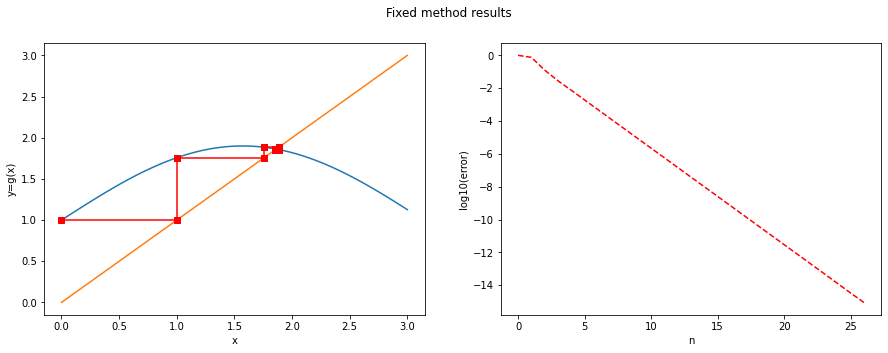

In [25]:
(r,rn)=fixed_point_method(g1,0,0,3,1e-15,1000,True);

We get the exact same results if we apply our "rootfinding" method (as they are equivalent, so far)


 Fixed point method with nmax=100 and tol=5.0e-16


|--n--|----xn----|---|g(xn)|---|---|f(xn)|---|
|--0--|3.00000000|1.12700801|1.87299199|
|--1--|1.12700801|1.81281842|0.68581041|
|--2--|1.81281842|1.87376980|0.06095138|
|--3--|1.87376980|1.85900819|0.01476161|
|--4--|1.85900819|1.86287830|0.00387011|
|--5--|1.86287830|1.86188181|0.00099649|
|--6--|1.86188181|1.86213962|0.00025781|
|--7--|1.86213962|1.86207300|0.00006662|
|--8--|1.86207300|1.86209022|0.00001722|
|--9--|1.86209022|1.86208577|0.00000445|
|--10--|1.86208577|1.86208692|0.00000115|
|--11--|1.86208692|1.86208663|0.00000030|
|--12--|1.86208663|1.86208670|0.00000008|
|--13--|1.86208670|1.86208668|0.00000002|
|--14--|1.86208668|1.86208669|0.00000001|
|--15--|1.86208669|1.86208669|0.00000000|
|--16--|1.86208669|1.86208669|0.00000000|
|--17--|1.86208669|1.86208669|0.00000000|
|--18--|1.86208669|1.86208669|0.00000000|
|--19--|1.86208669|1.86208669|0.00000000|
|--20--|1.86208669|1.86208669|0.00000000|
|--21--|1.86208669|1.8620866

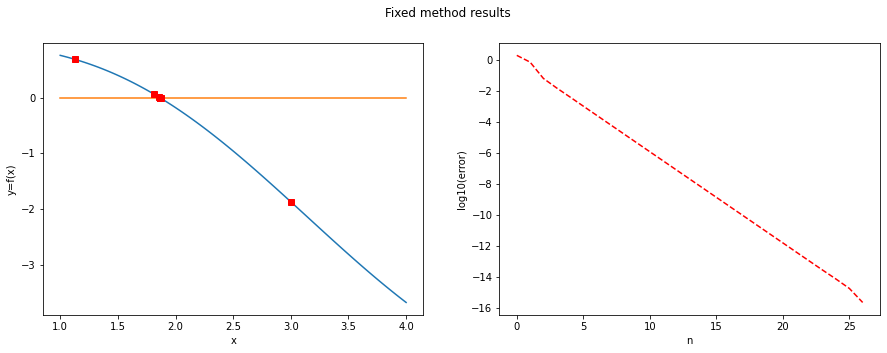

In [26]:
(r,rn)=fixed_point_method_rf(fun1,3,1,4,5e-16,100,True);

We now demonstrate the role the derivative of g(x) around the fixed point plays in the rate of convergence of the fixed point iteration method. For this purpose, we have 3 functions of the form 1 + c sin(x). 

In [27]:
def g1(x):
    return 1 + 0.9*np.sin(x); 
def ga5(x):
    return 1 + 0.5*np.sin(x); 
def ga1(x):
    return 1 + 0.01*np.sin(x); 

We run the method for each of these (with vrb=False), and then compare log10(en) against number of iterations n. We clearly see a direct relationship between the observed rate of convergence and the value of g'(x) at and around the fixed point. 

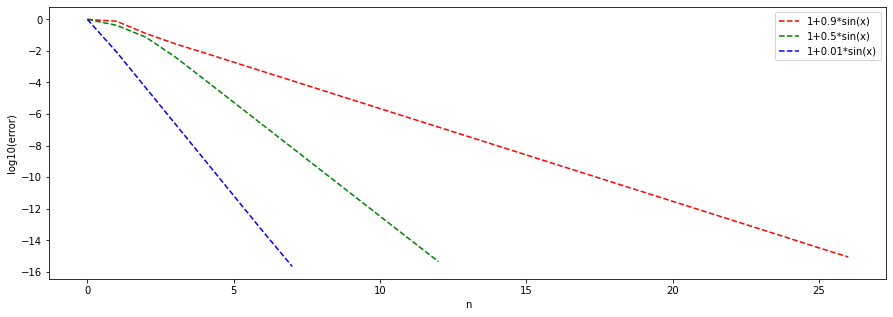

In [28]:
(r1,r1n)=fixed_point_method(g1,0,0,3,1e-15,1000,False);
(r2,r2n)=fixed_point_method(ga5,0,0,3,1e-15,1000,False);
(r3,r3n)=fixed_point_method(ga1,0,0,3,1e-15,1000,False);
e1 = np.abs(r1n-g1(r1n)); 
e2 = np.abs(r2n-ga5(r2n));
e3 = np.abs(r3n-ga1(r3n));
ln1 = np.arange(0,len(e1));
ln2 = np.arange(0,len(e2));
ln3 = np.arange(0,len(e3));
plt.plot(ln1,np.log10(e1),'r--',label="1+0.9*sin(x)");
plt.plot(ln2,np.log10(e2),'g--',label="1+0.5*sin(x)");
plt.plot(ln3,np.log10(e3),'b--',label="1+0.01*sin(x)");
plt.xlabel('n'); plt.ylabel('log10(error)');
plt.legend(); 

In [29]:
c1 = np.polyfit(ln1[1:len(e1)-1],np.log10(e1[1:len(e1)-1]),1); 
print(10**c1);
c2 = np.polyfit(ln2[1:len(e2)-1],np.log10(e2[1:len(e2)-1]),1); 
print(10**c2);
c3 = np.polyfit(ln3[1:len(e3)-1],np.log10(e3[1:len(e3)-1]),1); 
print(10**c3);


[0.25680568 1.86574348]
[ 0.04030041 37.06288293]
[0.00533506 1.58299093]


Finally, we demonstrate what can happen if the fixed point method is applied to a function with g'(x)>1 around the fixed point. The fixed point of g(x) (or root of f) "repels" all initial points chosen near it. This usually causes divergent behavior (cycling or going to infinity)

In [30]:
def fun2(x):
    return 3 + 2*np.sin(x)-x;

In [31]:
def g2(x):
    return 3 + 2*np.sin(x);


 Fixed point method with nmax=100 and tol=1.0e-15


|--n--|----xn----|---|g(xn)|---|
|--0--|3.00000000|3.28224002|
|--1--|3.28224002|2.71963177|
|--2--|2.71963177|3.81910025|
|--3--|3.81910025|1.74629390|
|--4--|1.74629390|4.96927957|
|--5--|4.96927957|1.06563065|
|--6--|1.06563065|4.75018862|
|--7--|4.75018862|1.00142864|
|--8--|1.00142864|4.68448405|
|--9--|4.68448405|1.00077863|
|--10--|1.00077863|4.68378286|
|--11--|4.68378286|1.00081825|
|--12--|1.00081825|4.68382562|
|--13--|4.68382562|1.00081581|
|--14--|1.00081581|4.68382298|
|--15--|4.68382298|1.00081596|
|--16--|1.00081596|4.68382314|
|--17--|4.68382314|1.00081595|
|--18--|1.00081595|4.68382313|
|--19--|4.68382313|1.00081595|
|--20--|1.00081595|4.68382313|
|--21--|4.68382313|1.00081595|
|--22--|1.00081595|4.68382313|
|--23--|4.68382313|1.00081595|
|--24--|1.00081595|4.68382313|
|--25--|4.68382313|1.00081595|
|--26--|1.00081595|4.68382313|
|--27--|4.68382313|1.00081595|
|--28--|1.00081595|4.68382313|
|--29--|4.68382313|1.0008

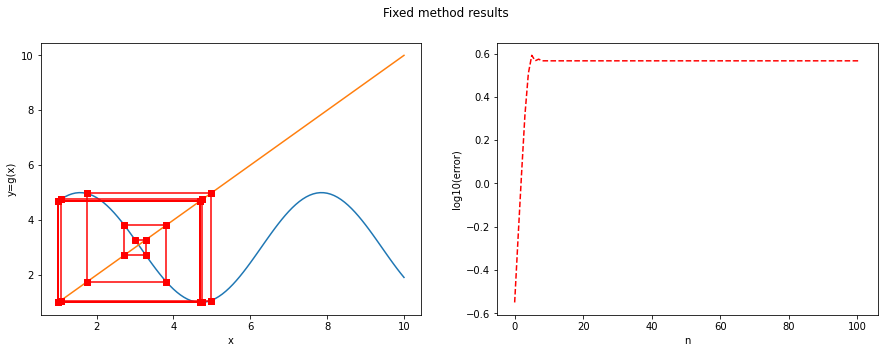

In [32]:
(r2,rn2)=fixed_point_method(g2,3,1,10,1e-15,100,True);

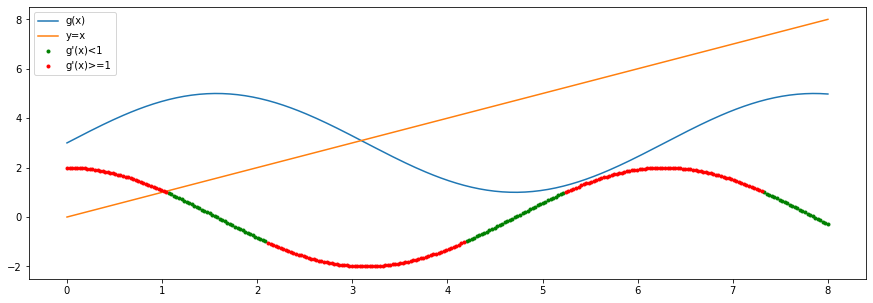

In [39]:
xl = np.linspace(0,8,300); 
def g2p(x):
    return 2*np.cos(x); 
yl=g2(xl);
plt.plot(xl,yl,label="g(x)"); #plot of y = g(x)
plt.plot(xl,xl,label="y=x"); #plot of line y = x. The intersection with g is the fixed point.
idconv = np.abs(g2p(xl))<1.0; 
iddiv = np.abs(g2p(xl))>=1.0; 
plt.plot(xl[idconv],g2p(xl[idconv]),'.g',label="g'(x)<1");
plt.plot(xl[iddiv],g2p(xl[iddiv]),'.r',label="g'(x)>=1");
plt.legend();